In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF

In [2]:
# Identify subsets of interest
categories = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']

# Import 20 Newsgroups Data
data = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42, remove=('headers','footers'))

### Question 1

Generate sparse TF-IDF representations: Following the steps in Project 1, trans- form the documents into TF-IDF vectors. Use min df = 3, exclude the stopwords (no need to do stemming or lemmatization), and remove the headers and footers. No need to do any additional data cleaning.

In [3]:
# Initialize TDIDF matrix, then fit to data. Use min df = 3 and exclude stopwords.
tfidf_vect = TfidfVectorizer(stop_words='english',min_df=3)
x_tfidf_data = tfidf_vect.fit_transform(data.data)

print("Shape of TF-IDF matrix: ", x_tfidf_data.shape)

Shape of TF-IDF matrix:  (7882, 23522)


### Question 2

Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random state, max iter and n init. Please use random state=0, max iter ≥ 1000 and n init ≥ 302. You can refer to sklearn - Clustering text documents using k-means for a basic work flow.

Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped?

In [4]:
# Need to save true labels separately for contingency matrix.
y_true = [int(i/4) for i in data.target]

# Initialize KMeans model, fit to training data, and predict training labels.
km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
y_pred = km.fit_predict(x_tfidf_data)

# Create contingency matrix
contingency = contingency_matrix(y_true,y_pred)
print("Contingency Matrix: ", contingency)

Contingency Matrix:  [[ 799 3104]
 [3923   56]]


### Question 3

Report the 5 clustering measures explained in the introduction for K-means clustering.

In [5]:
# Can find all clustering measures in scikit-learn metrics package
print('Homogeneity: ', homogeneity_score(y_true, y_pred))
print('Completeness: ', completeness_score(y_true, y_pred))
print('V-measure: ', v_measure_score(y_true, y_pred))
print('Adjusted Rand Index: ', adjusted_rand_score(y_true, y_pred))
print('Adjusted mutual information score: ', adjusted_mutual_info_score(y_true, y_pred))

Homogeneity:  0.5555385913621526
Completeness:  0.5718079023699979
V-measure:  0.5635558515124099
Adjusted Rand Index:  0.61311871193327
Adjusted mutual information score:  0.5635153178210184


### Question 4

Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

In [6]:
# Initialize Truncated SVD and fit to data.
svd = TruncatedSVD(n_components=1000, random_state=42)
x_svd = svd.fit_transform(x_tfidf_data)

Text(0, 0.5, 'Explained Variance Ratio per Component')

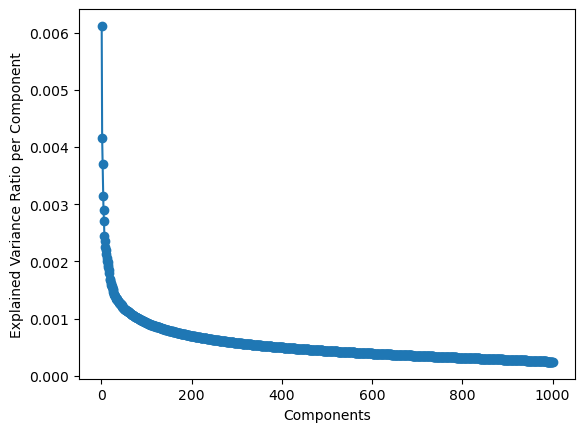

In [7]:
plt.figure()
plt.plot(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True),)
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

### Question 5

Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively.

SVD Scores

Homogeneity Scores:  [0.018976895064270794, 0.5469151624520435, 0.561687101914137, 0.5735881929763869, 0.5692819806694975, 0.5914866159224095]

Completeness Scores:  [0.019305105565919956, 0.5641050332664398, 0.5780055102632735, 0.5881506132995561, 0.5842735191003515, 0.6042197830365255]

V Measure Scores:  [0.019139593359716614, 0.5553771157317545, 0.5697294805305662, 0.5807781330157533, 0.5766803353155482, 0.5977854012537086]

Adjusted Rand Index Score:  [0.02592081203587794, 0.6024349108244749, 0.6182962629417924, 0.6347679829435243, 0.6295217991932576, 0.6567928040791708]

Adjusted Mutual Info Score [0.019049024807337243, 0.555335780064532, 0.5696895246650354, 0.5807392716503276, 0.5766410762112186, 0.5977481859457079]



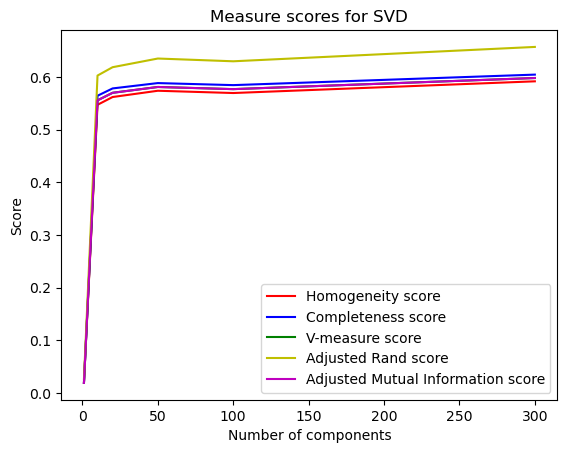

In [8]:
# Create array of r's
'''
SVD function does not take in negative values for n_components. I believe there was a typo in the original project guidelines;
I changed r = -10 to r = 10.
'''
r = [1, 10, 20, 50, 100, 300]

# Create empty arrays for each measure
svd_hom_score = []
svd_comp_score = []
svd_v_score = []
svd_adj_rand_score = []
svd_adj_mutual_info_score = []

# Get measure scores for each r value
for i in r:
    # Fit SVD to training data and predict labels
    y_pred = km.fit_predict(TruncatedSVD(n_components=i,random_state=42).fit_transform(x_tfidf_data))

    # Append scores to their respective measure arrays
    svd_hom_score.append(homogeneity_score(y_true, y_pred))
    svd_comp_score.append(completeness_score(y_true,y_pred))
    svd_v_score.append(v_measure_score(y_true,y_pred))
    svd_adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    svd_adj_mutual_info_score.append(adjusted_mutual_info_score(y_true,y_pred))

# Plot all five measures together
fig, ax = plt.subplots()
ax.plot(r,svd_hom_score, 'r', label='Homogeneity score')
ax.plot(r, svd_comp_score, 'b', label='Completeness score')
ax.plot(r, svd_v_score, 'g', label='V-measure score')
ax.plot(r,svd_adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,svd_adj_mutual_info_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")

# See all scores
print("SVD Scores")
print()
print('Homogeneity Scores: ', svd_hom_score)
print()
print('Completeness Scores: ', svd_comp_score)
print()
print('V Measure Scores: ', svd_v_score)
print()
print('Adjusted Rand Index Score: ', svd_adj_rand_score)
print()
print('Adjusted Mutual Info Score', svd_adj_mutual_info_score)
print()

/Users/mayadeshpande/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/mayadeshpande/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/mayadeshpande/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF Scores

Homogeneity Scores:  [0.018976895064270794, 0.03613763583869197, 0.03147448959307454, 0.03129702733698987, 0.022804025728248495, 0.01673497495346444]

Completeness Scores:  [0.019305105565919956, 0.13144159172247633, 0.12492257196180623, 0.131468501050522, 0.13576445094529882, 0.08565178315318572]

V Measure Scores:  [0.019139593359716614, 0.056689464975497386, 0.05028066578824123, 0.05055828850363574, 0.03904907327465802, 0.027999332575704056]

Adjusted Rand Index Score:  [0.02592081203587794, 0.008955992342204715, 0.007171111547812483, 0.006578312155606838, 0.0032510606622685972, 0.0032503799797708854]

Adjusted Mutual Info Score [0.019049024807337243, 0.056553826719698504, 0.05014157581213699, 0.050417661813521246, 0.03889805807624281, 0.027850152623570146]



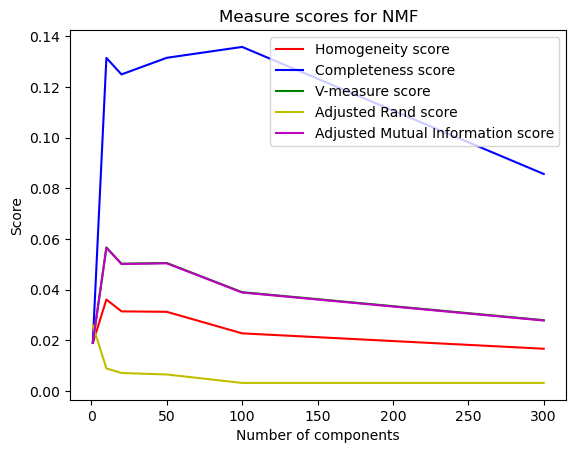

In [9]:
# Now do the same for NMF

'''
See question @70 on piazza; NMF taking too long with original max_iter = 1000, so I'm changing max_iter to 300.
The guidelines do not explicitly require us to run NMF on 1000 prinicple components and we don't look at n_components 
beyond 300 in rest of project anyway.
'''

# Can change max_iter to 300 for NMF after running for 1000 iterations once.
km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)

# Create empty arrays for each measure
nmf_hom_score = []
nmf_comp_score = []
nmf_v_score = []
nmf_adj_rand_score = []
nmf_adj_mutual_info_score = []

for i in r:
    # Fit NMF to training data and predit labels
    y_pred = km.fit_predict(NMF(n_components=i,init='random',random_state=42).fit_transform(x_tfidf_data))

    # Append scores to their respective measures
    nmf_hom_score.append(homogeneity_score(y_true, y_pred))
    nmf_comp_score.append(completeness_score(y_true,y_pred))
    nmf_v_score.append(v_measure_score(y_true,y_pred))
    nmf_adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    nmf_adj_mutual_info_score.append(adjusted_mutual_info_score(y_true,y_pred))

# Plot all five measures together
fig, ax = plt.subplots()
ax.plot(r,nmf_hom_score, 'r', label='Homogeneity score')
ax.plot(r, nmf_comp_score, 'b', label='Completeness score')
ax.plot(r, nmf_v_score, 'g', label='V-measure score')
ax.plot(r,nmf_adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,nmf_adj_mutual_info_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for NMF")

# See all scores
print("NMF Scores")
print()
print('Homogeneity Scores: ', nmf_hom_score)
print()
print('Completeness Scores: ', nmf_comp_score)
print()
print('V Measure Scores: ', nmf_v_score)
print()
print('Adjusted Rand Index Score: ', nmf_adj_rand_score)
print()
print('Adjusted Mutual Info Score', nmf_adj_mutual_info_score)
print()

### Question 6
How do you explain the non-monotonic behavior of the measures as r increases?

Homogeneity measures the extent to which each cluster contains only data points that are members of a single class. As r increases, the homogeneity score may initially improve because smaller clusters may become more homogenous. However, as r continues to increase, clusters might start to mix different classes, leading to a decrease in homogeneity.

Completeness measures how well all data points belonging to the same class are assigned to the same cluster. Similar to homogeneity, the completeness score may initially increase with r as smaller clusters become more representative of individual classes. However, with a very large r, there's a risk of over-segmentation, causing the completeness to decrease due to splitting classes into multiple clusters.

The V-measure is the harmonic mean of homogeneity and completeness. The non-monotonic behavior arises because, as r increases, homogeneity and completeness may change in opposite directions. Because the V-measure is influenced by the balance between the two, it may have non-monotonic behavior.

The Adjusted Rand Index and Adjusted Mutual Info Scores measure the similarity between the true and predicted clusterings, adjusted for chance. The behavior of this index can be non-monotonic because, with a moderate r, clusters may align well with true classes. However, as ' becomes very large, chance alignments may increase, leading to a decrease in the Adjusted Rand Index and Adjusted Mutual Info Scores.

### Question 7
Are these measures on average better than those computed in Question 3?

In [10]:
def average(lst): 
    return sum(lst) / len(lst) 

print('Average SVD Scores: ')
print()
print('Homogeneity: ', average(svd_hom_score))
print('Completeness: ', average(svd_comp_score))
print('V-measure: ', average(svd_v_score))
print('Adjusted Rand Index: ', average(svd_adj_rand_score))
print('Adjusted mutual information score: ', average(svd_adj_mutual_info_score))
print()

print('Average NMF Scores: ')
print()
print('Homogeneity: ', average(nmf_hom_score))
print('Completeness: ', average(nmf_comp_score))
print('V-measure: ', average(nmf_v_score))
print('Adjusted Rand Index: ', average(nmf_adj_rand_score))
print('Adjusted mutual information score: ', average(nmf_adj_mutual_info_score))
print()

Average SVD Scores: 

Homogeneity:  0.47698932483312423
Completeness:  0.48967659408867775
V-measure:  0.48324834320117455
Adjusted Rand Index:  0.5279557620030163
Adjusted mutual information score:  0.4832004772240264

Average NMF Scores: 

Homogeneity:  0.026237508085790017
Completeness:  0.1047590007332015
V-measure:  0.040619403079575504
Adjusted Rand Index:  0.00918794478725691
Adjusted mutual information score:  0.040485049975417825



Compared to Question 3, the scores for SVD are slightly worse and the scores for NMF are significantly worse.

### Question 8
Visualize the clustering results for:
- SVD with your optimal choice of r for K-Means clustering.
- NMF with your choice of r for K-Means clustering.

Text(0.5, 1.0, 'SVD Clustering Class Labels (r=10)')

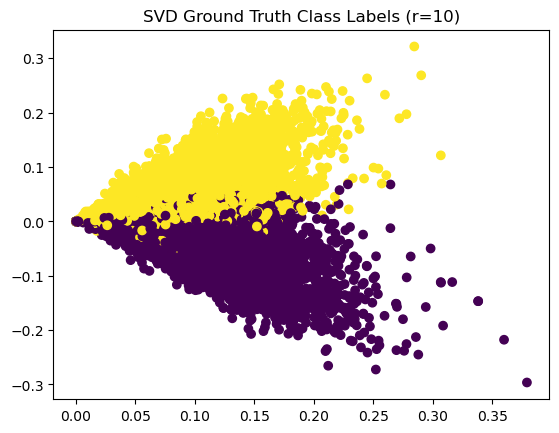

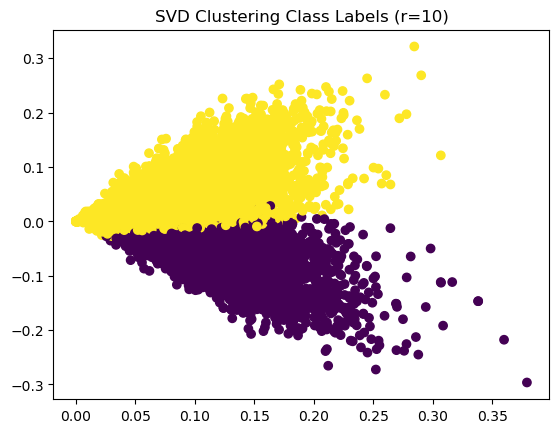

In [11]:
# Assign best SVD r to variable
r_best_svd = 10

# Create optimal-choice plot for SVD Ground Truth and Clustering Results
svd = TruncatedSVD(n_components=r_best_svd,random_state=0).fit_transform(x_tfidf_data)
plt.figure()
plt.scatter(svd[:,0],svd[:,1],c=y_true,cmap='viridis')
plt.title("SVD Ground Truth Class Labels (r=10)")

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
svd_labels = km.fit_predict(svd)
plt.figure()
plt.scatter(svd[:,0],svd[:,1],c=svd_labels,cmap='viridis')
plt.title("SVD Clustering Class Labels (r=10)")

Text(0.5, 1.0, 'NMF Clustering Class Labels (r=10)')

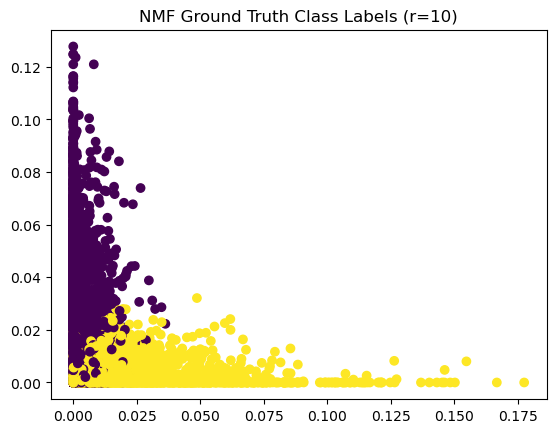

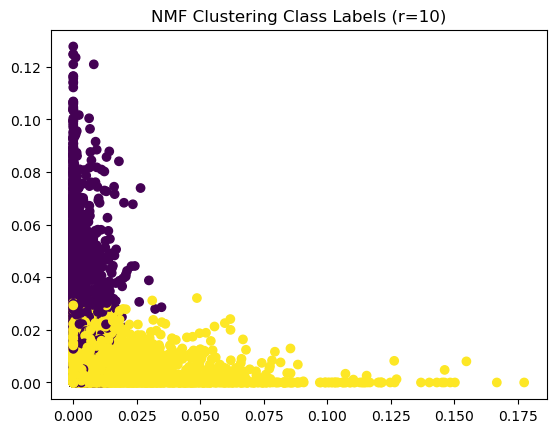

In [12]:
# Assign best NMF r to variable
r_best_nmf = 10

# Create optimal-choice plot for NMF Ground Truth and Clustering Results
nmf = NMF(n_components=r_best_nmf,init='random',random_state=0).fit_transform(x_tfidf_data)
plt.figure()
plt.scatter(nmf[:,0],nmf[:,1],c=y_true,cmap='viridis')
plt.title("NMF Ground Truth Class Labels (r=10)")

nmf_labels = km.fit_predict(nmf)
plt.figure()
plt.scatter(nmf[:,0],nmf[:,1],c=nmf_labels,cmap='viridis')
plt.title("NMF Clustering Class Labels (r=10)")

### Question 9
What do you observe in the visualization? How are the data points of the two classes distributed? Is distribution of the data ideal for K-Means clustering?

The differences in the distribution of data points between the SVD and NMF K-Means clustering results can be attributed to the underlying constraints in SVD and NMF. Because SVD doesn't enforce non-negativity constraints on the factorized matrices, it captures both positive and negative relationships between features in the data; clusters may be influenced by both positive and negative values. This can be seen in the SVD plot, where the data points of one cluster has only negative y-values. NMF does enforces non-negativity constraints on the factorized matrices, so it instead captures additive relationships between features; the clusters are influenced by positive values only. This can be seen in the NMF plot, where data points belonging to any cluster have only positive x and y-values. The ideal distribution of data for k-means clustering depends on specific characteristics of your data. For example, SVD is a useful clustering method when there is negative and positive data present in the dataset, but NMF is more useful when dealing with data where non-negativity is essential (eg. text data, image data with pixel intensities, etc.)